## CS180 Independent Study

This project uses fastai to build a classifier for spicules arine microorganisms. 
more about fastai: https://github.com/fastai

### Environment setup

These three lines of code should be on the top of every noteook, to get automatic reloading and inline plotting.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import libraries.

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

Setting the path to the data. The data folder should be placed under a same folder with this notebook file.
I'm going to use cross validation in this project, so I create 6 folders, in which contain different randomly selected data for tarinning/validing. 

In [3]:
#PATH = "data/cs180/"
PATH1 = "data/cs180-test1/"
PATH2 = "data/cs180-test2/"
PATH3 = "data/cs180-test3/"
PATH4 = "data/cs180-test4/"
PATH5 = "data/cs180-test5/"
PATH6 = "data/cs180-test6/"


Every test folder cotains a train folder and vaild folder. There are positive cases and negative cases in both the train and vaild folder. I distribute the data as below:

data/cs180-testX =>  train => positives => (76  positive cases)
                              negatives => (106 negative cases)

                    
                     vaild => positives => (18 positive cases)
                              negatives => (24 negative cases)


Set image size to 225 * 225. Since the original files have relatively low resolutions, 225 is more than enough.

In [4]:
sz = 225

## Initial run

configure all 6 tests

In [5]:
arch=resnet34
data1 = ImageClassifierData.from_paths(PATH1, tfms=tfms_from_model(arch, sz))
learn1 = ConvLearner.pretrained(arch, data1, precompute=True)


In [6]:
arch=resnet34
data2 = ImageClassifierData.from_paths(PATH2, tfms=tfms_from_model(arch, sz))
learn2 = ConvLearner.pretrained(arch, data2, precompute=True)


In [7]:
arch=resnet34
data3 = ImageClassifierData.from_paths(PATH3, tfms=tfms_from_model(arch, sz))
learn3 = ConvLearner.pretrained(arch, data3, precompute=True)


In [8]:
arch=resnet34
data4 = ImageClassifierData.from_paths(PATH4, tfms=tfms_from_model(arch, sz))
learn4 = ConvLearner.pretrained(arch, data4, precompute=True)


In [9]:
arch=resnet34
data5 = ImageClassifierData.from_paths(PATH5, tfms=tfms_from_model(arch, sz))
learn5 = ConvLearner.pretrained(arch, data5, precompute=True)


In [10]:
arch=resnet34
data6 = ImageClassifierData.from_paths(PATH6, tfms=tfms_from_model(arch, sz))
learn6 = ConvLearner.pretrained(arch, data6, precompute=True)


Run tests, since learning rate finder doesn't work well because I don't have enough data. I maunally tested different numbers for learning rate, I found out (0.08, 0.11) worked out pretty good.

In [11]:
%time learn1.fit(0.1, 20)

epoch      trn_loss   val_loss   accuracy                
    0      0.495443   0.902704   0.595238  
    1      0.279064   0.259327   0.880952        
    2      0.19723    0.059526   1.0             
    3      0.157913   0.060533   0.97619         
    4      0.131033   0.118195   0.97619         
    5      0.109534   0.156749   0.97619         
    6      0.092293   0.168756   0.97619         
    7      0.079461   0.152505   0.97619         
    8      0.068537   0.12846    0.97619         
    9      0.059772   0.111316   0.97619         
    10     0.053001   0.103305   0.97619         
    11     0.047092   0.103849   0.97619         
    12     0.042132   0.113646   0.97619         
    13     0.037806   0.110227   0.97619         
    14     0.034852   0.121629   0.97619         
    15     0.031727   0.14295    0.97619         
    16     0.028829   0.16395    0.97619         
    17     0.026287   0.176853   0.97619         
    18     0.024027   0.185486   0.97619        

[array([0.19413]), 0.976190447807312]

In [12]:
%time learn2.fit(0.1, 20)

epoch      trn_loss   val_loss   accuracy        
    0      0.435529   1.705863   0.578947  
    1      0.26907    1.181533   0.631579        
    2      0.195225   0.495179   0.868421        
    3      0.151542   0.307595   0.947368        
    4      0.123001   0.219324   0.973684        
    5      0.104653   0.148992   0.973684        
    6      0.086919   0.077087   0.973684        
    7      0.074471   0.028718   0.973684        
    8      0.065525   0.018248   1.0             
    9      0.057798   0.023674   0.973684        
    10     0.050832   0.024103   0.973684        
    11     0.045071   0.022318   0.973684        
    12     0.040217   0.022105   0.973684        
    13     0.036169   0.02295    0.973684        
    14     0.03262    0.024927   0.973684        
    15     0.030718   0.021758   0.973684        
    16     0.027932   0.018628   0.973684        
    17     0.025646   0.019302   0.973684        
    18     0.023442   0.018707   0.973684        
    19

[array([0.01826]), 0.9736841917037964]

In [13]:
%time learn3.fit(0.1, 20)

epoch      trn_loss   val_loss   accuracy        
    0      0.570337   2.522965   0.583333  
    1      0.323873   1.288973   0.722222        
    2      0.225264   0.697159   0.805556        
    3      0.167717   0.485856   0.833333        
    4      0.13513    0.452662   0.916667        
    5      0.109972   0.49681    0.944444        
    6      0.091827   0.546459   0.944444        
    7      0.077812   0.577103   0.944444        
    8      0.067219   0.582372   0.944444        
    9      0.061003   0.654187   0.944444        
    10     0.055309   0.673743   0.944444        
    11     0.049547   0.691228   0.944444        
    12     0.044247   0.71338    0.944444        
    13     0.042759   0.734087   0.944444        
    14     0.038745   0.765938   0.944444        
    15     0.03557    0.803679   0.944444        
    16     0.032385   0.823164   0.944444        
    17     0.029848   0.805778   0.944444        
    18     0.02729    0.777925   0.944444        
    19

[array([0.7486]), 0.9444444179534912]

In [14]:
%time learn4.fit(0.1, 20)

epoch      trn_loss   val_loss   accuracy        
    0      0.423168   1.816174   0.583333  
    1      0.263831   1.032794   0.75            
    2      0.185083   0.436524   0.888889        
    3      0.150593   0.21578    0.972222        
    4      0.126449   0.142579   0.972222        
    5      0.104891   0.100782   0.972222        
    6      0.090492   0.055265   0.972222        
    7      0.077644   0.029325   0.972222        
    8      0.066831   0.013359   1.0             
    9      0.058232   0.008105   1.0             
    10     0.05129    0.005274   1.0             
    11     0.045681   0.004187   1.0             
    12     0.041093   0.005046   1.0             
    13     0.036887   0.00557    1.0             
    14     0.033278   0.005966   1.0             
    15     0.030878   0.008614   1.0             
    16     0.028081   0.014096   1.0             
    17     0.026068   0.018185   1.0             
    18     0.023948   0.011422   1.0             
    19

[array([0.00802]), 1.0]

In [15]:
%time learn5.fit(0.1, 20)

epoch      trn_loss   val_loss   accuracy        
    0      0.380204   1.262382   0.638889  
    1      0.255866   1.029482   0.722222        
    2      0.201797   0.910582   0.75            
    3      0.167043   0.539546   0.805556        
    4      0.133295   0.189189   0.916667        
    5      0.11133    0.042511   0.972222        
    6      0.093687   0.016001   1.0             
    7      0.079798   0.005066   1.0             
    8      0.068924   0.001731   1.0             
    9      0.063656   0.000989   1.0             
    10     0.058305   0.001055   1.0             
    11     0.051742   0.001172   1.0             
    12     0.046761   0.001274   1.0             
    13     0.042246   0.001628   1.0             
    14     0.038199   0.002309   1.0             
    15     0.037441   0.004786   1.0             
    16     0.034113   0.013297   1.0             
    17     0.031122   0.026055   0.972222        
    18     0.028995   0.038422   0.972222        
    19

[array([0.04781]), 0.9722222089767456]

In [16]:
%time learn6.fit(0.1, 20)

epoch      trn_loss   val_loss   accuracy        
    0      0.519156   1.925207   0.583333  
    1      0.3368     1.80451    0.666667        
    2      0.243571   0.854217   0.722222        
    3      0.190396   0.171297   0.944444        
    4      0.15015    0.07466    0.972222        
    5      0.126167   0.100349   0.972222        
    6      0.108348   0.086638   0.972222        
    7      0.092071   0.076982   0.944444        
    8      0.082988   0.09657    0.944444        
    9      0.074148   0.111196   0.944444        
    10     0.066804   0.121281   0.944444        
    11     0.059314   0.129258   0.944444        
    12     0.055397   0.10533    0.944444        
    13     0.050416   0.062534   0.944444        
    14     0.045482   0.046132   0.972222        
    15     0.041274   0.046592   0.972222        
    16     0.037751   0.051335   0.972222        
    17     0.034581   0.047265   0.972222        
    18     0.031713   0.045156   0.972222        
    19

[array([0.04171]), 0.9722222089767456]

Learning rate finder.

In [17]:
#learn = learn1
#data = data1
#learn = ConvLearner.pretrained(arch, data, precompute=True)

In [18]:
#lrf=learn.lr_find()

In [19]:
#learn.sched.plot_lr()

In [20]:
#learn.sched.plot()

### Run 2, with more data generated from modifying the original data

New imagine can be upside down, max zoom is 1.1.

In [21]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

The code below is for taking a peek at the new imagines.  

In [22]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH1, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [23]:
ims = np.stack([get_augs() for i in range(6)])

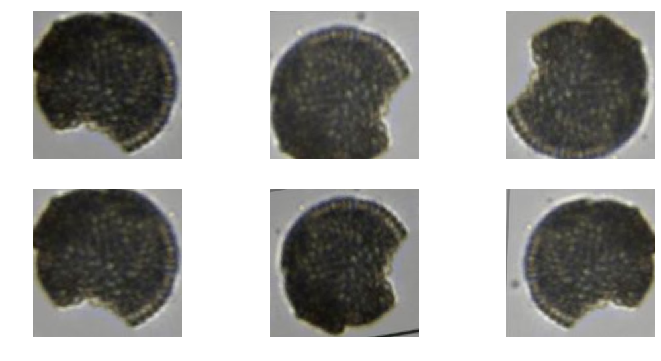

In [24]:
plots(ims, rows=2)

run test

In [25]:
data1 = ImageClassifierData.from_paths(PATH1, tfms=tfms)
learn1 = ConvLearner.pretrained(arch, data1, precompute=True)

data2 = ImageClassifierData.from_paths(PATH2, tfms=tfms)
learn2 = ConvLearner.pretrained(arch, data2, precompute=True)

data3 = ImageClassifierData.from_paths(PATH3, tfms=tfms)
learn3 = ConvLearner.pretrained(arch, data3, precompute=True)

data4 = ImageClassifierData.from_paths(PATH4, tfms=tfms)
learn4 = ConvLearner.pretrained(arch, data4, precompute=True)

data5 = ImageClassifierData.from_paths(PATH5, tfms=tfms)
learn5 = ConvLearner.pretrained(arch, data5, precompute=True)

data6 = ImageClassifierData.from_paths(PATH6, tfms=tfms)
learn6 = ConvLearner.pretrained(arch, data6, precompute=True)



In [26]:
%time learn1.fit(0.1, 20)


epoch      trn_loss   val_loss   accuracy        
    0      0.553455   2.047267   0.571429  
    1      0.331382   0.864098   0.761905        
    2      0.242361   0.271879   0.928571        
    3      0.198842   0.053857   0.952381        
    4      0.157146   0.12177    0.97619         
    5      0.127185   0.243802   0.97619         
    6      0.109817   0.341755   0.97619         
    7      0.09598    0.389161   0.97619         
    8      0.082862   0.400052   0.97619         
    9      0.078495   0.395646   0.97619         
    10     0.069042   0.358071   0.97619         
    11     0.061271   0.336768   0.97619         
    12     0.054769   0.323366   0.97619         
    13     0.049216   0.325662   0.952381        
    14     0.044586   0.329834   0.952381        
    15     0.040485   0.321721   0.952381        
    16     0.036786   0.329111   0.952381        
    17     0.033559   0.333505   0.952381        
    18     0.031306   0.330149   0.952381        
    19

[array([0.31611]), 0.9523809552192688]

In [27]:
%time learn2.fit(0.1, 20)


epoch      trn_loss   val_loss   accuracy        
    0      0.560166   1.600807   0.578947  
    1      0.315429   0.64461    0.763158        
    2      0.216525   0.293012   0.973684        
    3      0.168956   0.293247   0.973684        
    4      0.132853   0.25365    0.973684        
    5      0.107538   0.20752    0.973684        
    6      0.090581   0.172573   0.973684        
    7      0.076792   0.139541   0.973684        
    8      0.073171   0.168231   0.973684        
    9      0.063739   0.22924    0.973684        
    10     0.056412   0.264118   0.973684        
    11     0.050364   0.272085   0.973684        
    12     0.04508    0.271533   0.973684        
    13     0.040525   0.266667   0.973684        
    14     0.036552   0.259756   0.973684        
    15     0.033116   0.256267   0.973684        
    16     0.031172   0.236272   0.973684        
    17     0.028448   0.202108   0.973684        
    18     0.026018   0.173096   0.973684        
    19

[array([0.15361]), 0.9736841917037964]

In [28]:
%time learn3.fit(0.1, 20)


epoch      trn_loss   val_loss   accuracy        
    0      0.429251   4.110538   0.583333  
    1      0.248766   3.807214   0.611111        
    2      0.167596   2.414573   0.666667        
    3      0.126015   1.693606   0.777778        
    4      0.100069   1.176079   0.805556        
    5      0.081133   0.855208   0.861111        
    6      0.069066   0.800746   0.888889        
    7      0.06054    0.755008   0.916667        
    8      0.052887   0.833746   0.944444        
    9      0.049779   0.868963   0.944444        
    10     0.044089   0.883375   0.944444        
    11     0.039173   0.92605    0.944444        
    12     0.034949   0.950864   0.944444        
    13     0.031435   0.964435   0.944444        
    14     0.028351   0.970925   0.944444        
    15     0.026376   0.98745    0.944444        
    16     0.023983   0.995892   0.944444        
    17     0.021873   1.008081   0.944444        
    18     0.021312   0.996659   0.944444        
    19

[array([0.92048]), 0.9444444179534912]

In [29]:
%time learn4.fit(0.1, 20)


epoch      trn_loss   val_loss   accuracy        
    0      0.576666   1.354085   0.583333  
    1      0.357114   0.518903   0.777778        
    2      0.260279   0.181558   0.916667        
    3      0.198575   0.109584   0.972222        
    4      0.164954   0.050308   0.972222        
    5      0.138839   0.038853   0.972222        
    6      0.11908    0.026895   0.972222        
    7      0.103216   0.025317   0.972222        
    8      0.089297   0.02072    0.972222        
    9      0.077806   0.016846   1.0             
    10     0.068503   0.014128   1.0             
    11     0.06132    0.013613   1.0             
    12     0.05571    0.011242   1.0             
    13     0.052389   0.005406   1.0             
    14     0.047775   0.001658   1.0             
    15     0.043732   0.00051    1.0             
    16     0.039841   0.000333   1.0             
    17     0.036622   0.000215   1.0             
    18     0.03366    0.000173   1.0             
    19

[array([0.00017]), 1.0]

In [30]:
%time learn5.fit(0.1, 20)


epoch      trn_loss   val_loss   accuracy        
    0      0.527055   2.454841   0.583333  
    1      0.305866   1.712449   0.638889        
    2      0.24694    0.955127   0.722222        
    3      0.188903   0.428896   0.888889        
    4      0.152329   0.156275   0.972222        
    5      0.124066   0.021991   0.972222        
    6      0.104612   0.001889   1.0             
    7      0.090696   0.000656   1.0             
    8      0.078165   0.000544   1.0             
    9      0.070006   0.000567   1.0             
    10     0.061672   0.000968   1.0             
    11     0.054697   0.001366   1.0             
    12     0.049119   0.001056   1.0             
    13     0.044116   0.000907   1.0             
    14     0.039803   0.000973   1.0             
    15     0.036735   0.000126   1.0             
    16     0.033457   4e-05      1.0             
    17     0.032726   7.3e-05    1.0             
    18     0.029917   0.000119   1.0             
    19

[array([0.00026]), 1.0]

In [31]:
%time learn6.fit(0.1, 20)


epoch      trn_loss   val_loss   accuracy        
    0      0.498306   2.277165   0.583333  
    1      0.345477   1.396399   0.694444        
    2      0.254511   0.406708   0.861111        
    3      0.203886   0.086822   0.972222        
    4      0.163054   0.006978   1.0             
    5      0.134722   0.001253   1.0             
    6      0.112154   0.00051    1.0             
    7      0.095058   0.000311   1.0             
    8      0.084161   0.000308   1.0             
    9      0.074128   0.000398   1.0             
    10     0.065213   0.000805   1.0             
    11     0.057808   0.001118   1.0             
    12     0.052682   0.003097   1.0             
    13     0.047297   0.006313   1.0             
    14     0.042658   0.013038   1.0             
    15     0.038863   0.017861   1.0             
    16     0.035326   0.022135   0.972222        
    17     0.033183   0.039507   0.972222        
    18     0.030351   0.062904   0.972222        
    19

[array([0.09781]), 0.9722222089767456]

saving our models to prevent losts in case of out of GPU mem.

In [32]:
learn1.save('1_lastlayer')
learn2.save('2_lastlayer')
learn3.save('3_lastlayer')
learn4.save('4_lastlayer')
learn5.save('5_lastlayer')
learn6.save('6_lastlayer')

In [33]:
learn1.load('1_lastlayer')
learn2.load('2_lastlayer')
learn3.load('3_lastlayer')
learn4.load('4_lastlayer')
learn5.load('5_lastlayer')
learn6.load('6_lastlayer')

### Run 3, with precompute=False

In [12]:
learn1.precompute=False
learn2.precompute=False
learn3.precompute=False
learn4.precompute=False
learn5.precompute=False
learn6.precompute=False

In [13]:
print('test1')
%time learn1.fit(0.1, 2, cycle_len=3)

test1


 33%|███▎      | 1/3 [00:01<00:03,  1.53s/it, loss=3.78e-05]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

In [42]:
print('test2')
%time learn2.fit(0.1, 10, cycle_len=3)

test2


epoch      trn_loss   val_loss   accuracy        
    0      0.000195   0.080185   0.973684  
    1      9.5e-05    0.079896   0.973684        
    2      6.5e-05    0.084176   0.973684        
    3      0.00014    0.081522   0.973684        
    4      0.001371   0.071044   0.973684        
    5      0.001107   0.072124   0.973684        
    6      0.000918   0.070723   0.973684        
    7      0.000903   0.069616   0.973684        
    8      0.000779   0.069684   0.973684        
    9      0.000678   0.069807   0.973684        
    10     0.000599   0.069428   0.973684        
    11     0.000535   0.072183   0.973684        
    12     0.003035   0.082838   0.973684        
    13     0.002723   0.083268   0.973684        
    14     0.002506   0.082746   0.973684        
    15     0.00227    0.082253   0.973684        
    16     0.002065   0.077432   0.973684        
    17     0.001886   0.080927   0.973684        
    18     0.001725   0.080734   0.973684        
    19

[array([0.07551]), 0.9736841917037964]

In [43]:
print('test3')
%time learn3.fit(0.1, 10, cycle_len=3)

test3


epoch      trn_loss   val_loss   accuracy        
    0      2.2e-05    0.541549   0.944444  
    1      1.2e-05    0.537844   0.944444        
    2      9e-06      0.53807    0.944444        
    3      7e-06      0.536546   0.944444        
    4      9e-05      0.542843   0.944444        
    5      9.4e-05    0.542914   0.944444        
    6      0.003528   0.547833   0.944444        
    7      0.003055   0.550038   0.944444        
    8      0.002632   0.551304   0.944444        
    9      0.002294   0.554024   0.944444        
    10     0.002017   0.553567   0.944444        
    11     0.001788   0.549936   0.944444        
    12     0.001599   0.551238   0.944444        
    13     0.001434   0.550107   0.944444        
    14     0.001294   0.553427   0.944444        
    15     0.001171   0.555701   0.944444        
    16     0.001065   0.557619   0.944444        
    17     0.000971   0.558219   0.944444        
    18     0.000887   0.557126   0.944444        
    19

[array([0.55941]), 0.9444444179534912]

In [44]:
print('test4')
%time learn4.fit(0.1, 10, cycle_len=3)

test4


epoch      trn_loss   val_loss   accuracy        
    0      0.009177   0.040209   0.972222  
    1      0.004705   0.041057   0.972222        
    2      0.003043   0.041139   0.972222        
    3      0.002212   0.042623   0.972222        
    4      0.001716   0.044951   0.972222        
    5      0.001401   0.043618   0.972222        
    6      0.001166   0.04533    0.972222        
    7      0.000987   0.045223   0.972222        
    8      0.000876   0.043291   0.972222        
    9      0.000763   0.043414   0.972222        
    10     0.000828   0.045139   0.972222        
    11     0.000743   0.043785   0.972222        
    12     0.001362   0.040888   0.972222        
    13     0.001222   0.037999   0.972222        
    14     0.001102   0.037752   0.972222        
    15     0.001023   0.0328     0.972222        
    16     0.000978   0.031762   0.972222        
    17     0.000891   0.031798   0.972222        
    18     0.000816   0.029398   1.0             
    19

[array([0.02348]), 1.0]

In [45]:
print('test5')
%time learn5.fit(0.1, 10, cycle_len=3)

test5


epoch      trn_loss   val_loss   accuracy        
    0      0.000643   0.151345   0.972222  
    1      0.00034    0.1487     0.972222        
    2      0.00022    0.147735   0.972222        
    3      0.00025    0.149771   0.972222        
    4      0.000247   0.150133   0.972222        
    5      0.000201   0.150477   0.972222        
    6      0.000173   0.153047   0.972222        
    7      0.000147   0.154375   0.972222        
    8      0.000393   0.151532   0.972222        
    9      0.000342   0.145897   0.972222        
    10     0.000301   0.149364   0.972222        
    11     0.000275   0.140914   0.972222        
    12     0.000246   0.13687    0.972222        
    13     0.000221   0.13348    0.972222        
    14     0.0002     0.132518   0.972222        
    15     0.000181   0.136399   0.972222        
    16     0.000166   0.14104    0.972222        
    17     0.000151   0.140645   0.972222        
    18     0.00014    0.136734   0.972222        
    19

[array([0.21588]), 0.9722222089767456]

In [46]:
print('test6')
%time learn6.fit(0.1, 10, cycle_len=3)

test6


epoch      trn_loss   val_loss   accuracy        
    0      0.000352   0.067797   0.972222  
    1      0.003156   0.073516   0.972222        
    2      0.002062   0.075899   0.972222        
    3      0.001555   0.075634   0.972222        
    4      0.001208   0.077772   0.972222        
    5      0.000977   0.074417   0.972222        
    6      0.000868   0.076147   0.972222        
    7      0.000802   0.077107   0.972222        
    8      0.00069    0.074514   0.972222        
    9      0.000602   0.072876   0.972222        
    10     0.000531   0.067727   0.972222        
    11     0.000471   0.067424   0.972222        
    12     0.000422   0.064429   0.972222        
    13     0.000379   0.062999   0.972222        
    14     0.000342   0.067282   0.972222        
    15     0.000345   0.073777   0.972222        
    16     0.000314   0.071979   0.972222        
    17     0.000286   0.070913   0.972222        
    18     0.000262   0.070357   0.972222        
    19

[array([0.05647]), 0.9722222089767456]

### Run 4 with an array of learning rate. (needs 2G+ GPU memory)

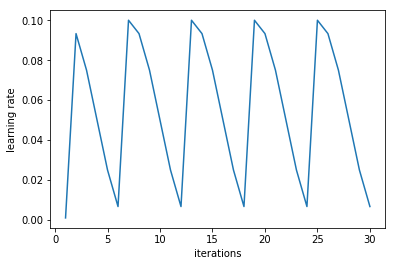

In [14]:
learn1.sched.plot_lr()

In [13]:
learn1.unfreeze()

In [14]:
lr=np.array([1e-4,1e-3,1e-2])

In [ ]:
#%time learn1.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
#%time learn2.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
#%time learn3.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
#%time learn4.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
#%time learn5.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
#%time learn6.fit(lr, 3, cycle_len=1, cycle_mult=2)

## Examine the wrong classifies

We need to know which is 'negatives'/'positives'.
In this case, o is negatives, 1 is positives

## Test1

In [48]:
data = data1
learn =learn1
PATH = PATH1
data.classes

['negatives', 'positives']

Below is code from fastai course, it is for looking at the result.

In [49]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)



In [51]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect positives")

Most incorrect positives
Not Found.


Most incorrect nagetives


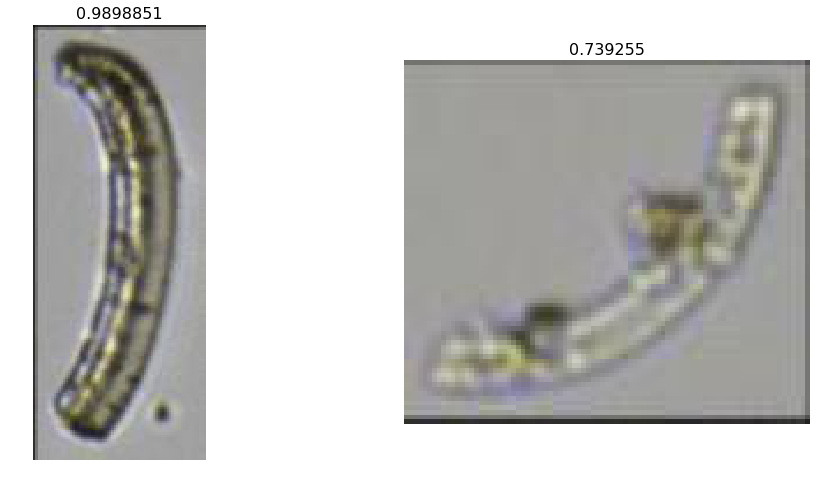

In [52]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect nagetives")

## Test2 

In [55]:
data = data2
learn =learn2
PATH = PATH2
data.classes
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)



Most incorrect positives


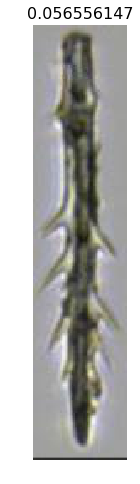

In [56]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect positives")

In [57]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect nagetives")

Most incorrect nagetives
Not Found.


## Test3

In [58]:
data = data3
learn =learn3
PATH = PATH3
data.classes
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)



Most incorrect positives


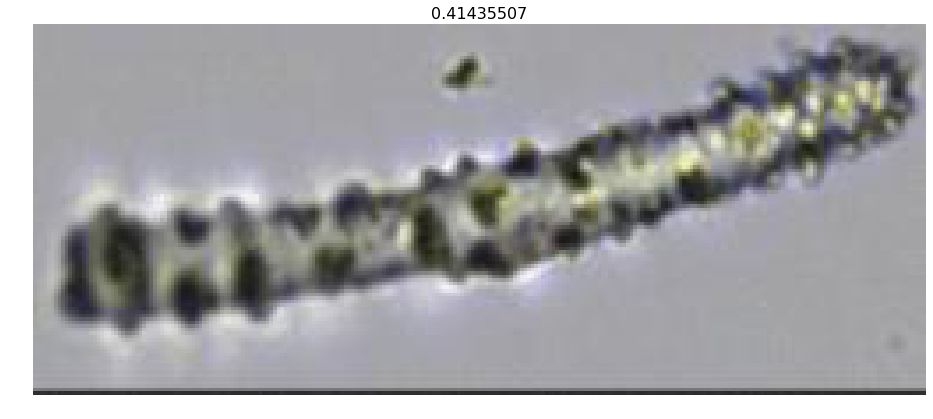

In [59]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect positives")

Most incorrect nagetives


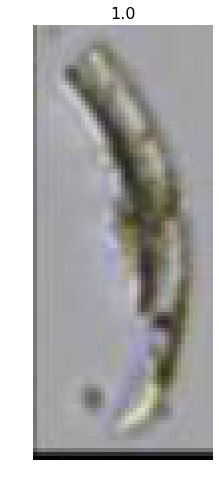

In [60]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect nagetives")

## Test4

In [61]:
data = data4
learn =learn4
PATH = PATH4
data.classes
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)



In [62]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect positives")

Most incorrect positives
Not Found.


In [63]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect nagetives")

Most incorrect nagetives
Not Found.


## Test5

In [64]:
data = data5
learn =learn5
PATH = PATH5
data.classes
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)



Most incorrect positives


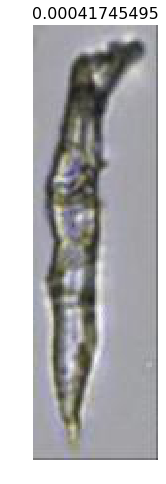

In [65]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect positives")

In [66]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect nagetives")

Most incorrect nagetives
Not Found.


## Test6

In [67]:
data = data6
learn =learn6
PATH = PATH6
data.classes
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)



Most incorrect nagetives


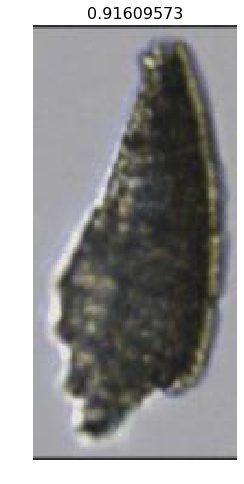

In [68]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect nagetives")

In [69]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect positives")

Most incorrect positives
Not Found.
